# Classification de base: classer les images de vêtements

In [85]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [86]:
# Helper librairies
import numpy as np
import matplotlib.pyplot as plt

In [87]:
print(tf.__version__)

2.3.0


# Importer le jeu de données Fashion MNIST

In [88]:
 fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [89]:
 class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Explorez les données

Explorons le format de l'ensemble de données avant d'entraîner le modèle. Ce qui suit montre qu'il y a 60000 images dans l'ensemble d'apprentissage, chaque image étant représentée en 28 x 28 pixels: 

In [90]:
train_images.shape

(60000, 28, 28)

De même, il y a 60000 étiquettes dans l'ensemble de formation: 

In [91]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Chaque étiquette est un entier compris entre 0 et 9: 

In [92]:
test_images.shape

(10000, 28, 28)

Il y a 10 000 images dans l'ensemble de test. Encore une fois, chaque image est représentée par 28 x 28 pixels: 

In [93]:
train_images[0];

# Prétraitez les données

 Les données doivent être prétraitées avant d'entraîner le réseau. Si vous inspectez la première image de l'ensemble d'apprentissage, vous constaterez que les valeurs de pixel sont comprises entre 0 et 255: 

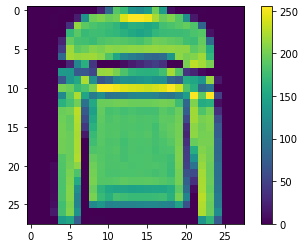

In [94]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()


Mettez ces valeurs à l'échelle de 0 à 1 avant de les transmettre au modèle de réseau neuronal. Pour ce faire, divisez les valeurs par 255. Il est important que l' ensemble d'apprentissage et l' ensemble de test soient prétraités de la même manière: 

In [95]:
train_images = train_images / 255.0

test_images = test_images / 255.0


Pour vérifier que les données sont au bon format et que vous êtes prêt à créer et à former le réseau, affichons les 25 premières images de l' ensemble d'entraînement et affichons le nom de la classe sous chaque image. 

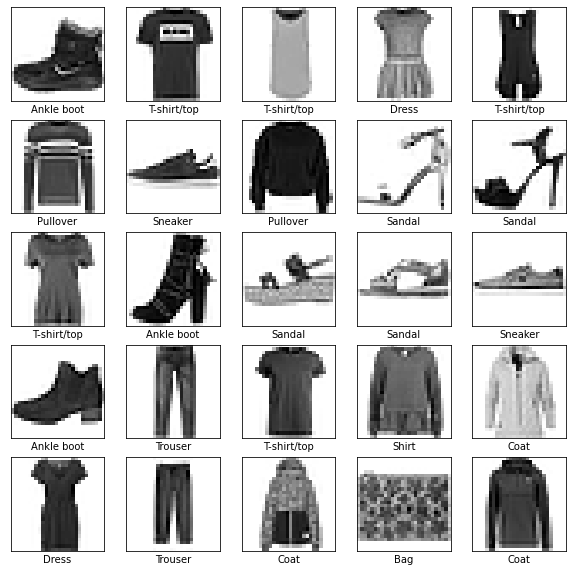

In [96]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
 
    

# Construisez le modèle

La constuction du réseau neuronal nécessite la configuration des couches du modèle et la compilation du modèle.

# Configurez les couches

Le bloc de construction de base d'un réseau neuronal est la couche . Les couches extraient des représentations des données qui y sont introduites. Espérons que ces représentations sont significatives pour le problème en question. 

La plupart de l'apprentissage en profondeur consiste à enchaîner des couches simples. La plupart des couches, telles que tf.keras.layers.Dense , ont des paramètres qui sont appris pendant l'entraînement. 

In [97]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


La première couche de ce réseau, tf.keras.layers.Flatten , transforme le format des images d'un tableau bidimensionnel (de 28 par 28 pixels) en un tableau unidimensionnel (de 28 * 28 = 784 pixels). Considérez ce calque comme un dépilage de lignes de pixels dans l'image et en les alignant. Cette couche n'a pas de paramètres à apprendre; il ne reformate que les données. 

Une fois les pixels aplatis, le réseau se compose d'une séquence de deux couches tf.keras.layers.Dense . Ce sont des couches neuronales densément connectées ou entièrement connectées. La première couche Dense a 128 nœuds (ou neurones). La deuxième (et dernière) couche renvoie un tableau logits d'une longueur de 10. Chaque nœud contient un score qui indique que l'image actuelle appartient à l'une des 10 classes. 

# Compilez le modèle

Avant que le modèle ne soit prêt pour l'entraînement, il a besoin de quelques paramètres supplémentaires. Ceux-ci sont ajoutés lors de l'étape de compilation du modèle: 

     Fonction de perte - Cela mesure la précision du modèle pendant l'entraînement. Vous voulez minimiser cette fonction pour "diriger" le modèle dans la bonne direction.
    Optimiseur: c'est ainsi que le modèle est mis à jour en fonction des données qu'il voit et de sa fonction de perte.
    Metrics -Utilisé pour suivre la formation et les étapes d' essai. L'exemple suivant utilise la précision , la fraction des images correctement classées. 

In [98]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Formez le modèle

 La formation du modèle de réseau neuronal nécessite les étapes suivantes:

    Envoyez les données d'entraînement au modèle. Dans cet exemple, les données d'apprentissage se train_images dans les tableaux train_images et train_labels .
    Le modèle apprend à associer des images et des étiquettes.
    Vous demandez au modèle de faire des prédictions sur un jeu de test - dans cet exemple, le tableau test_images .
    Vérifiez que les prédictions correspondent aux étiquettes du tableau test_labels . 

# Nourrir le modèle

Pour démarrer l'entraînement, appelez la méthode model.fit , ainsi appelée parce qu'elle «adapte» le modèle aux données d'entraînement: 

In [99]:
 model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5022 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3737 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3386 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3122 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2952 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2828 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2706 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2601 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2498 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

Au fur et à mesure que le modèle s'entraîne, les mesures de perte et de précision sont affichées. Ce modèle atteint une précision d'environ 0,91 (ou 91%) sur les données d'entraînement. 

# Evaluez la précision

Ensuite, comparez les performances du modèle sur l'ensemble de données de test: 

In [100]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3331 - accuracy: 0.8828

Test accuracy: 0.8827999830245972


Il s'avère que la précision sur l'ensemble de données de test est un peu inférieure à la précision sur l'ensemble de données d'entraînement. Cet écart entre la précision de la formation et la précision du test représente un surajustement . Le surajustement se produit lorsqu'un modèle d'apprentissage automatique est moins performant sur les nouvelles entrées auparavant invisibles que sur les données d'entraînement. Un modèle sur-ajusté «mémorise» le bruit et les détails dans l'ensemble de données d'apprentissage à un point où il a un impact négatif sur les performances du modèle sur les nouvelles données. Pour plus d’informations, consultez les éléments suivants: 

     Démontrer un surajustement
    Stratégies pour éviter le surajustement 

# Faire des prédictions

Avec le modèle entraîné, vous pouvez l'utiliser pour faire des prédictions sur certaines images. Les sorties linéaires du modèle, logits . Attachez une couche softmax pour convertir les logits en probabilités, qui sont plus faciles à interpréter. 

In [101]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
 

In [102]:
 predictions = probability_model.predict(test_images)


Ici, le modèle a prédit l'étiquette pour chaque image de l'ensemble de test. Jetons un coup d'œil à la première prédiction: 

In [103]:
predictions[0]

array([3.6771240e-08, 7.7037356e-08, 2.0557749e-08, 1.4928273e-07,
       3.9143973e-08, 2.0465597e-03, 3.3504537e-07, 8.2075223e-03,
       1.2356820e-07, 9.8974520e-01], dtype=float32)

Une prédiction est un tableau de 10 nombres. Ils représentent la «confiance» du modèle que l'image correspond à chacun des 10 articles vestimentaires différents. Vous pouvez voir quelle étiquette a la valeur de confiance la plus élevée: 

In [104]:
np.argmax(predictions[0])

9

Ainsi, le modèle est le plus convaincu que cette image est une bottine, ou class_names[9] . L'examen de l'étiquette de test montre que cette classification est correcte: 

In [105]:
 test_labels[0]


9

Représentez-le graphiquement pour voir l'ensemble complet des 10 prédictions de classe. 

In [106]:
 def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
 

# Vérifier les prédictions

Avec le modèle entraîné, vous pouvez l'utiliser pour faire des prédictions sur certaines images. 

Regardons la 0ème image, les prédictions et le tableau de prédiction. Les étiquettes de prédiction correctes sont bleues et les étiquettes de prédiction incorrectes sont rouges. Le nombre donne le pourcentage (sur 100) pour l'étiquette prédite. 

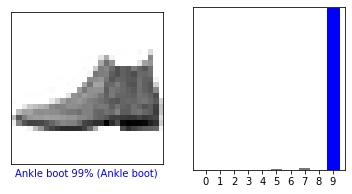

In [107]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


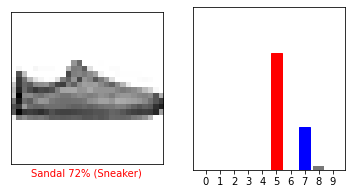

In [108]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
 

Tracons plusieurs images avec leurs prédictions. Notez que le modèle peut se tromper même lorsqu'il est très confiant. 

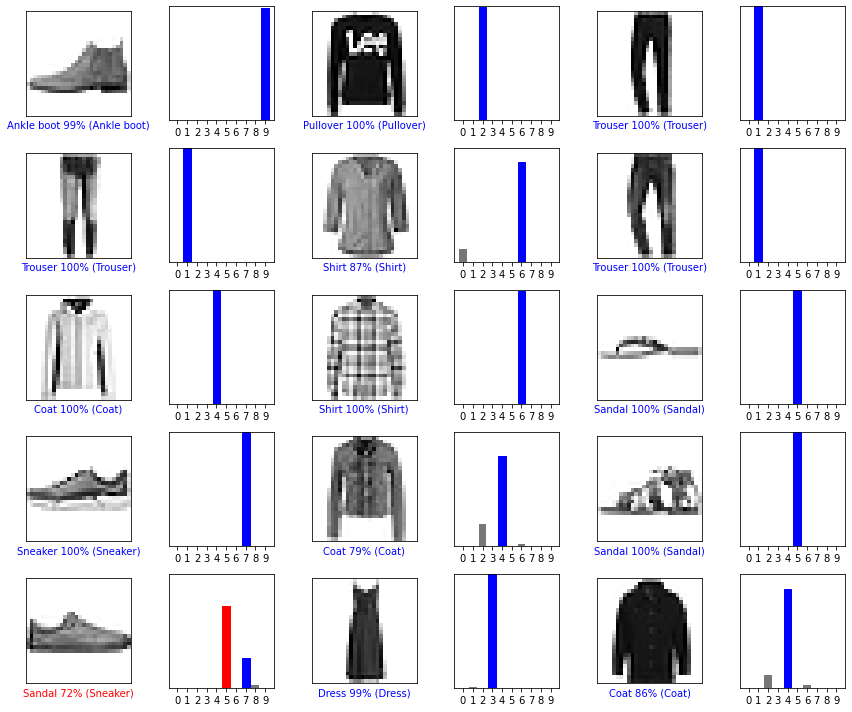

In [109]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
 

# Utilisez le modèle entraîné

Enfin, utilisez le modèle entraîné pour faire une prédiction sur une seule image. 

In [110]:
 # Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


tf.keras modèles tf.keras sont optimisés pour faire des prédictions sur un lot ou une collection d'exemples à la fois. Par conséquent, même si vous utilisez une seule image, vous devez l'ajouter à une liste: 

In [111]:
 # Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
 

(1, 28, 28)


Maintenant, prédisez l'étiquette correcte pour cette image: 

In [112]:
 predictions_single = probability_model.predict(img)

print(predictions_single)
 

[[1.5705882e-05 7.4441335e-14 9.9836344e-01 4.5675119e-16 1.5515016e-03
  3.0815054e-15 6.9404741e-05 9.6484641e-22 2.7352906e-11 2.6320263e-13]]


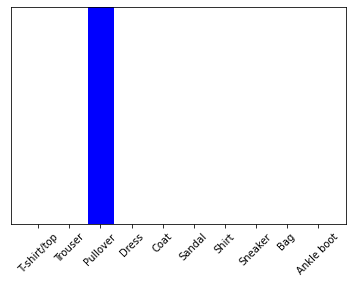

In [113]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
 

keras.Model.predict renvoie une liste de listes - une liste pour chaque image du lot de données. Prenez les prédictions pour notre (seule) image dans le lot: 

In [115]:
 np.argmax(predictions_single[0])
 

2

Et le modèle prédit une étiquette comme prévu. 

In [117]:
 
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.
 

Ce guide utilise le jeu de données Fashion MNIST qui contient 70 000 images en niveaux de gris dans 10 catégories. Les images montrent des vêtements individuels à basse résolution (28 par 28 pixels), comme on le voit ici: 

 Fashion MNIST est conçu pour remplacer le jeu de données classique MNIST, souvent utilisé comme le "Hello, World" des programmes d'apprentissage automatique pour la vision par ordinateur. L'ensemble de données MNIST contient des images de chiffres manuscrits (0, 1, 2, etc.) dans un format identique à celui des articles vestimentaires que vous utiliserez ici.

Ce guide utilise Fashion MNIST pour la variété, et parce que c'est un problème légèrement plus difficile que le MNIST normal. Les deux ensembles de données sont relativement petits et sont utilisés pour vérifier qu'un algorithme fonctionne comme prévu. Ce sont de bons points de départ pour tester et déboguer le code.

Ici, 60 000 images sont utilisées pour former le réseau et 10 000 images pour évaluer la précision avec laquelle le réseau a appris à classer les images. Vous pouvez accéder au Fashion MNIST directement depuis TensorFlow. Importez et chargez les données Fashion MNIST directement depuis TensorFlow: 